In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')

In [2]:
TEST = pd.read_csv('titanic_test.csv')
TRAIN = pd.read_csv('titanic_train.csv')

In [3]:
TEST.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
TRAIN.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
TRAIN.duplicated().sum()

0

In [6]:
TRAIN.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
print('The number of samples into the test data is {}.'.format(TEST.shape[0]))

The number of samples into the test data is 418.


<AxesSubplot:xlabel='Age', ylabel='Density'>

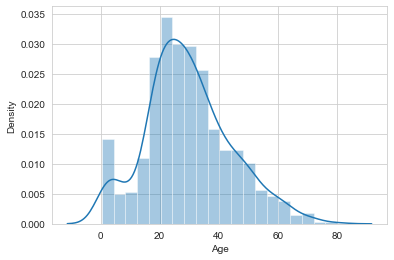

In [8]:
sns.distplot(TRAIN['Age'])

In [9]:
TRAIN.drop('Cabin', axis=1, inplace=True)

In [10]:
TRAIN.drop('Ticket', axis=1, inplace=True)

In [11]:
TRAIN.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
TRAIN.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [13]:
TRAIN["Age"].fillna(TRAIN["Age"].mean(), inplace=True)
TRAIN["Fare"].fillna(TRAIN["Fare"].mean(), inplace=True)

In [14]:
TRAIN.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [15]:
TRAIN['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

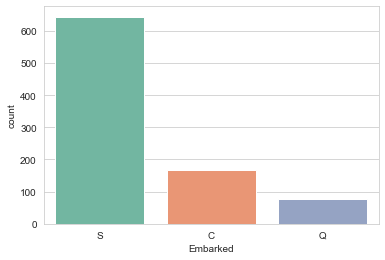

In [16]:
sns.countplot(x='Embarked', data=TRAIN, palette='Set2')
plt.show()

In [17]:
#TRAIN= pd.get_dummies(TRAIN,columns=['Sex','Embarked'])#split them to columns

In [18]:
TRAIN.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [19]:
#TRAIN.drop('SibSp', axis=1, inplace=True)
TRAIN.drop('Parch', axis=1, inplace=True)
TRAIN.drop(['PassengerId', 'Name'], axis=1, inplace=True) 

In [20]:
TRAIN.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [21]:
TEST["Age"].fillna(TRAIN["Age"].median(skipna=True), inplace=True)
TEST["Fare"].fillna(TRAIN["Fare"].median(skipna=True), inplace=True)
TEST.drop('Cabin', axis=1, inplace=True)

In [22]:
#TEST.drop('SibSp', axis=1, inplace=True)
TEST.drop('Parch', axis=1, inplace=True)

#TEST = pd.get_dummies(TEST, columns=["Pclass","Embarked","Sex"])
TEST.drop('PassengerId', axis=1, inplace=True)
TEST.drop('Name', axis=1, inplace=True)
TEST.drop('Ticket', axis=1, inplace=True)


In [23]:
TEST.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,male,34.5,0,7.8292,Q
1,3,female,47.0,1,7.0000,S
2,2,male,62.0,0,9.6875,Q
3,3,male,27.0,0,8.6625,S
4,3,female,22.0,1,12.2875,S


In [24]:
TRAIN.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


<AxesSubplot:xlabel='Pclass', ylabel='count'>

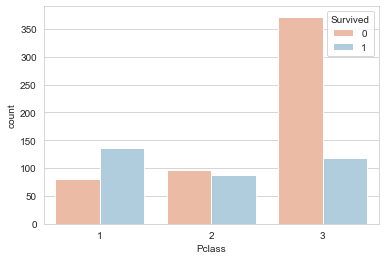

In [25]:
sns.countplot(x='Pclass', hue ='Survived', data= TRAIN, palette='RdBu')

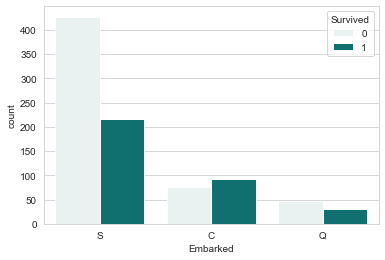

In [26]:
sns.countplot(x='Embarked', hue='Survived', data=TRAIN, color="teal")
plt.show()

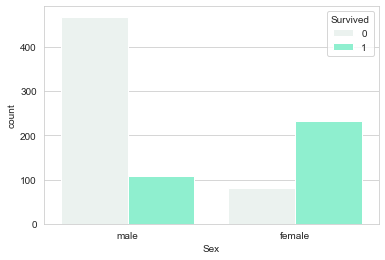

In [27]:
sns.countplot(x='Sex', hue='Survived', data=TRAIN, color="aquamarine")
plt.show()

In [28]:
TRAIN= pd.get_dummies(TRAIN,columns=['Sex','Embarked'])#split them to columns
TEST = pd.get_dummies(TEST, columns=["Embarked","Sex"])

In [29]:
TRAIN.head()

,Survived,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,7.2500,0,1,0,0,1
1,1,1,38.0,1,71.2833,1,0,1,0,0
2,1,3,26.0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,53.1000,1,0,0,0,1
4,0,3,35.0,0,8.0500,0,1,0,0,1


In [30]:
TEST.head()

,Pclass,Age,SibSp,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,3,34.5,0,7.8292,0,1,0,0,1
1,3,47.0,1,7.0000,0,0,1,1,0
2,2,62.0,0,9.6875,0,1,0,0,1
3,3,27.0,0,8.6625,0,0,1,0,1
4,3,22.0,1,12.2875,0,0,1,1,0


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

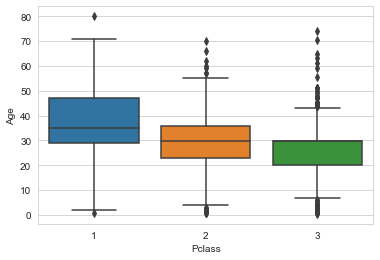

In [31]:
# checking for outliers
sns.boxplot(x ="Pclass", y="Age",data = TRAIN)

# LOGISTIC REGRESSION

In [44]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [45]:
X_train = TRAIN.drop(['Survived'], axis=1)
y_train  = TRAIN['Survived']
X_test = TEST

In [46]:
X_test.head()

,Pclass,Age,SibSp,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,3,34.5,0,7.8292,0,1,0,0,1
1,3,47.0,1,7.0000,0,0,1,1,0
2,2,62.0,0,9.6875,0,1,0,0,1
3,3,27.0,0,8.6625,0,0,1,0,1
4,3,22.0,1,12.2875,0,0,1,1,0


In [47]:
X_train.head()

,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,7.2500,0,1,0,0,1
1,1,38.0,1,71.2833,1,0,1,0,0
2,3,26.0,0,7.9250,1,0,0,0,1
3,1,35.0,1,53.1000,1,0,0,0,1
4,3,35.0,0,8.0500,0,1,0,0,1


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=101)

In [49]:
lr = LogisticRegression()

In [50]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
y_pred = lr.predict(X_test)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [53]:
print(accuracy_score(y_test, y_pred))

0.7798507462686567


In [54]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.78      0.86      0.82       154
          1       0.78      0.67      0.72       114

avg / total       0.78      0.78      0.78       268



In [55]:
print(confusion_matrix(y_test, y_pred))

[[133  21]
 [ 38  76]]
